# FineST inference on demo data

## Main goals

- Goal1: Run FineST on demo dataset that iStar used (as demo).
- Goal2: Examine the inference performance of FineST at spot level.

In [1]:
import os
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import torch
import scanpy as sc
import logging
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import json

# import FineST as fst
# from FineST.datasets import dataset
# import FineST.plottings as fstplt
# print("torch version: %s" %torch.__version__)
# print("FineST version: %s" %fst.__version__)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
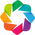

In [2]:
## From GPU2
path = '/mnt/lingyu/nfs_share2/Python/'
os.chdir(str(path) + 'FineST/FineST/')
import FineST as fst
from FineST.datasets import dataset
import FineST.plottings as fstplt

In [4]:
path = '/mnt/lingyu/nfs_share2/Python/'

fst.setup_seed(666)

if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)

colors = ["#000003",  "#3b0f6f",  "#8c2980",   "#f66e5b", "#fd9f6c", "#fbfcbf"]
cnt_color = clr.LinearSegmentedColormap.from_list('magma', colors, N=256)

0.1 Make logging and save model

In [5]:
logging.getLogger().setLevel(logging.INFO)

model_folder = str(path) + 'FineST/FineST_local/Finetune/'
dir_name = model_folder + datetime.now().strftime('%Y%m%d%H%M%S%f')
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    logger = fst.setup_logger(dir_name)

print(dir_name)

/mnt/lingyu/nfs_share2/Python/FineST/FineST_local/Finetune/20250225230814682723


0.2 Load parameter settings

You can use the `parameter_file_path` you set or the optimal parameters obtained from your train and test model for your dataset, but here we use our trained `parameter_file_path` for paper results repeated (saved in `FineST/FineST/Parameter/parameters_NPC_P10125.json`).

In [6]:
# parameter_file_path = str(path) + 'FineST/FineST/parameter/parameters_NPC_P10125.json'
parameter_file_path = str(path) + 'FineST/FineST_local/Parameter/parameters_demo_virchow2.json'
with open(parameter_file_path,"r") as json_file:
    params = json.load(json_file)

logger.info("Load parameters:\n" + json.dumps(params, indent=2))

[2025-02-25 23:08:14] INFO - Load parameters:
{
  "n_encoder_hidden_matrix": 256,
  "n_encoder_hidden_image": 128,
  "n_encoder_latent": 128,
  "n_projection_hidden": 256,
  "n_projection_output": 128,
  "batch_size": 50,
  "batch_size_pair": 64,
  "n_encoder_layers": 2,
  "dropout_rate": 0,
  "training_epoch": 50,
  "inital_learning_rate": 0.25,
  "k_nearest_positives": 0,
  "temperature": 0.03,
  "n_input_image": 1280,
  "w1": 0,
  "w2": 0,
  "w3": 1,
  "w4": 1
}


## 1. Load ST data and Image embeddings

1.1 Load spatial data

A human Nasopharyngeal carcinoma dataset (NPC_patient_1) from [Gong, et al](https://www.nature.com/articles/s41467-023-37614-6). will be used as a reference dataset, raw_feature_bc_matrix, filtered_feature_bc_matrix, and spatial coordinates (.h5) are publicly available in [GSE200310](https://ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE200310). For easier reuse, we included them in an anndata object which can be loaded directly in FineST Python package.

In [7]:
adata_df = pd.read_csv(f"{path}FineST/FineST_local/Dataset/Demo/cnts.tsv", sep='\t', index_col=0)
adata_df

,FO538757.1,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,...,F8,FUNDC2,BRCC3,VBP1,CLIC2,SPRY3,VAMP7,USP9Y,TMSB4Y,NLGN4Y
spot,,,,,,,,,,,,,,,,,,,,,
10x10,0,1,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
10x11,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
10x12,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10x13,0,0,0,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
10x14,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9x23,0,0,0,0,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9x24,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9x25,0,0,0,0,0,0,1,3,1,0,...,0,1,0,1,0,0,0,0,0,0


In [8]:
loc_df = pd.read_csv(f'{path}FineST/FineST_local/Dataset/Demo/locs-raw.tsv', sep='\t', index_col=0)
loc_df

,x,y
spot,,
10x10,14160.500000,13648.000000
10x11,14150.500000,12925.500000
10x12,14151.000000,12195.500000
10x13,14126.000000,11465.500000
10x14,14138.500000,10745.500000
...,...,...
9x23,14813.998031,4169.998031
9x24,14801.500000,3440.000000
9x25,14864.000000,2702.500000


In [9]:
# first_col = [1] * len(loc_df)
# second_col = [int(spot.split('x')[0]) for spot in loc_df.index]
# third_col = [int(spot.split('x')[1]) for spot in loc_df.index]

# loc_df_list = pd.DataFrame({
#     0: first_col,
#     1: second_col,
#     2: third_col,
#     3: loc_df['y'].values,
#     4: loc_df['x'].values
# }, index=loc_df.index)
# print(loc_df_list.head())
# loc_df_list.to_csv(f'{path}FineST/FineST_local/Dataset/Demo/tissue_positions_list.csv', header=False)

In [10]:
# sacle_factor = 0.14
# loc_df_sacle = loc_df*sacle_factor
# loc_df_sacle.columns = ['pxl_row_in_fullres', 'pxl_col_in_fullres']
# print(loc_df_sacle.head())
# loc_df_sacle.to_csv(f'{path}FineST/FineST_local/Dataset/Demo/locs_raw.csv')

In [11]:
print(loc_df['x'].max(), loc_df['y'].max())

20057.5 15798.0


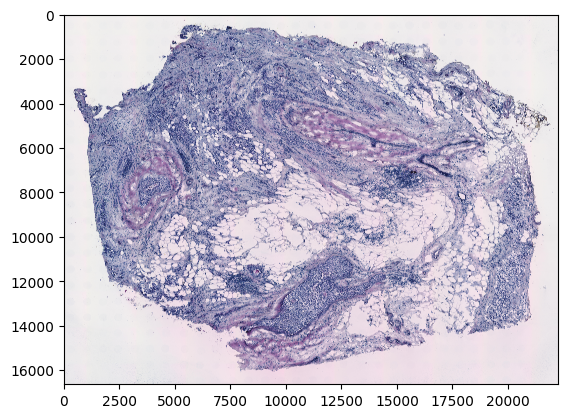

In [10]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

img = Image.open(f'{path}FineST/FineST_local/Dataset/Demo/he-raw.jpg')
img = np.array(img)

# Display the image
imgplot = plt.imshow(img)
plt.show()

In [12]:
from scipy.sparse import csr_matrix
adata = sc.AnnData(np.zeros((adata_df.shape[0], adata_df.shape[1])))
adata.X = csr_matrix(adata_df, dtype=np.float32)
adata.obs_names = adata_df.index    
adata.var_names = adata_df.columns   
adata.obsm['spatial'] = np.array(loc_df.loc[:, ['x', 'y']])
adata.obs['in_tissue'] = pd.DataFrame([1]*adata_df.shape[0], index=adata_df.index, columns=['in_tissue'])
adata

AnnData object with n_obs × n_vars = 441 × 14992
    obs: 'in_tissue'
    obsm: 'spatial'

In [13]:
print(adata.obsm['spatial'][:5])  
print(adata.obsm['spatial'][:,0].max(), adata.obsm['spatial'][:,1].max())

[[14160.5 13648. ]
 [14150.5 12925.5]
 [14151.  12195.5]
 [14126.  11465.5]
 [14138.5 10745.5]]
20057.5 15798.0


In [14]:
print(13648.0-12925.5)
print(12925.5-12195.5)
print(12195.5-11465.5)

722.5
730.0
730.0


In [15]:
patch_size_x = fst.patch_size(adata, p=6, dir='x')
patch_size_y = fst.patch_size(adata, p=6, dir='y')
print(patch_size_x)
print(patch_size_y)

94      707.500000
115     745.000000
156    1387.500000
176     747.500000
197     725.001969
Name: 0, dtype: float64
311     747.0
304    4375.0
310    4340.0
309     690.0
308     737.5
Name: 1, dtype: float64


In [16]:
# adata_example = dataset.NPC()
# print(adata_example)

1.2 Selected LR genes 

In FineST, we only considers 963 human genes involved in ligand-receptor pairs from [CellChatDB (version.1.1.3)](https://github.com/sqjin/CellChat/tree/master/data) (mouse: 2,022 pairs, human: 1,940 pairs, zebrafish: 2,774 pairs), and extract the overlap gene's expression profile.

In [17]:
LR_gene_path = str(path)+'FineST/FineST/Dataset/LRgene/LRgene_CellChatDB_baseline.csv'
adata = fst.adata_LR(adata, LR_gene_path)
print(adata)

AnnData object with n_obs × n_vars = 441 × 647
    obs: 'in_tissue'
    obsm: 'spatial'


1.3 Data preprocess

After making an intersection with the LR genes and filtering out genes that are detected in less than 10 cells, 596 genes from the NPC datasetare used for training and prediction.

In [18]:
adata_count = adata.copy()
adata = fst.adata_preprocess(adata_count, keep_raw=True, normalize=False, min_cells=0)
print(adata)

gene_hv = np.array(adata.var_names)
matrix = fst.adata2matrix(adata, gene_hv)
matrix

AnnData object with n_obs × n_vars = 441 × 647
    obs: 'in_tissue'
    var: 'mt', 'n_cells'
    obsm: 'spatial'
(441, 647)


,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,SEMA6D,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1
,,,,,,,,,,,,,,,,,,,,,
10x10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
10x11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10x12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
10x13,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
10x14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9x23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
9x24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
9x25,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [19]:
contains_nan = matrix.isnull().values.any()
print(f"Does adata.X contain NaN values? {contains_nan}")

Does adata.X contain NaN values? False


1.4 Order by image file name

Load image embedding from **Setp0** `HIPT_image_feature_extract.py`. For NPC dataset, the image embedding file can be downloaded [Goole Drive](https://drive.google.com/drive/folders/1ypaTohLM2lP4EnKeYTS6QUvv-ymcRVZo) (within spots: AH_Patient1_pth_64_16, between spots: NEW_AH_Patient1_pth_64_16, single-nuclei: sc_Patient1_pth_16_16).

In [20]:
file_paths = sorted(os.listdir(str(path) + 'FineST/FineST_local/Dataset/Demo/HIPT/Demo_pth_56_14/'))
print("Image embedding file (first three .pth):\n", file_paths[:3])

Image embedding file (first three .pth):
 ['Demo_FineST_10415.5_7065.499999999999.pth', 'Demo_FineST_10418.0_5607.5.pth', 'Demo_FineST_10418.499999999998_2705.0000000000005.pth']


In [21]:
## Image patch position
position_image = fst.get_image_coord(file_paths, dataset_class="VisiumHD")

## convert numeric and save %2.f
position_image = position_image.apply(pd.to_numeric)
position_image = position_image.round(1)

print("The coords of image patch: \n",position_image.shape)

contains_nan = position_image.isnull().values.any()
print(f"Does adata.X contain NaN values? {contains_nan}")

print(position_image.head())

position_image

The coords of image patch: 
 (441, 2)
Does adata.X contain NaN values? False
   pixel_x  pixel_y
0   7065.5  10415.5
1   5607.5  10418.0
2   2705.0  10418.5
3   1242.5  10421.0
4   6352.5  10425.5


,pixel_x,pixel_y
0,7065.5,10415.5
1,5607.5,10418.0
2,2705.0,10418.5
3,1242.5,10421.0
4,6352.5,10425.5
...,...,...
436,6370.5,9770.5
437,15798.0,9772.5
438,10750.5,9775.5
439,13635.5,9775.5


In [22]:
## ST spot position
position = pd.read_csv(str(path)+'FineST/FineST_local/Dataset/Demo/tissue_positions_list.csv', header=None)
position = position.rename(columns={position.columns[-2]: 'pixel_x', 
                                    position.columns[-1]: 'pixel_y'})
print("The coords of ST spot: \n", position.shape)

contains_nan = position.isnull().values.any()
print(f"Does adata.X contain NaN values? {contains_nan}")

## convert numeric and save %2.f
position[['pixel_x', 'pixel_y']] = position[['pixel_x', 'pixel_y']].apply(pd.to_numeric)
position[['pixel_x', 'pixel_y']] = position[['pixel_x', 'pixel_y']].round(1)

print(position.head())
position

The coords of ST spot: 
 (441, 6)
Does adata.X contain NaN values? False
       0  1   2   3  pixel_x  pixel_y
0  10x10  1  10  10  13648.0  14160.5
1  10x11  1  10  11  12925.5  14150.5
2  10x12  1  10  12  12195.5  14151.0
3  10x13  1  10  13  11465.5  14126.0
4  10x14  1  10  14  10745.5  14138.5


,0,1,2,3,pixel_x,pixel_y
0,10x10,1,10,10,13648.0,14160.5
1,10x11,1,10,11,12925.5,14150.5
2,10x12,1,10,12,12195.5,14151.0
3,10x13,1,10,13,11465.5,14126.0
4,10x14,1,10,14,10745.5,14138.5
...,...,...,...,...,...,...
436,9x23,1,9,23,4170.0,14814.0
437,9x24,1,9,24,3440.0,14801.5
438,9x25,1,9,25,2702.5,14864.0
439,9x26,1,9,26,1984.5,14804.0


In [23]:
position_image.head()
print(position_image['pixel_x'].max(), position_image['pixel_y'].max())

15798.0 20057.5


In [24]:
position.head()
print(position['pixel_x'].max(), position['pixel_y'].max())

15798.0 20057.5


In [25]:
## merge position
position_image = fst.image_coord_merge(position_image, position, dataset_class = 'Visium')

contains_nan = position_image.isnull().values.any()
print(f"Does adata.X contain NaN values? {contains_nan}")

position_image

Does adata.X contain NaN values? False


,0,1,x,y,pixel_x,pixel_y
0,15x19,1,15,19,7065.5,10415.5
1,15x21,1,15,21,5607.5,10418.0
2,15x25,1,15,25,2705.0,10418.5
3,15x27,1,15,27,1242.5,10421.0
4,15x20,1,15,20,6352.5,10425.5
...,...,...,...,...,...,...
436,16x20,1,16,20,6370.5,9770.5
437,16x7,1,16,7,15798.0,9772.5
438,16x14,1,16,14,10750.5,9775.5
439,16x10,1,16,10,13635.5,9775.5


In [26]:
position_order = fst.update_st_coord(position_image)
print("The coords of image patch (merged): \n", position_order.shape)
print(position_order.head())

The coords of image patch (merged): 
 (441, 4)
   pixel_y  pixel_x  array_row  array_col
0  10415.5   7065.5         19         15
1  10418.0   5607.5         21         15
2  10418.5   2705.0         25         15
3  10421.0   1242.5         27         15
4  10425.5   6352.5         20         15


In [27]:
# ## merge position
# position_image = fst.image_coord_merge(position_image, position, dataset_class = 'Visium')
# position_order = fst.update_st_coord(position_image)
# print("The coords of image patch (merged): \n", position_order.shape)
# print(position_order.head())

In [28]:
print(position_order['pixel_y'].max(), position_order['pixel_x'].max())

20057.5 15798.0


In [29]:
# print(position_order['pixel_y'].max(), position_order['pixel_x'].max())

In [30]:
## save the position data  -- train model used
position_order.to_csv(str(path)+'FineST/FineST_local/Dataset/Demo/ContrastDemoLRgene/position_order.csv', index=False, header=False)

1.5 Order matrix row/barcode, spatial coordinates by image coordinates

In [31]:
spotID_order = np.array(position_image[0])
matrix_order, matrix_order_df = fst.sort_matrix(matrix, position_image, spotID_order, gene_hv)
matrix_order_df

,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,SEMA6D,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1
15x19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15x21,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15x25,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
15x27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
15x20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16x20,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16x7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16x14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16x10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
contains_nan = matrix.isnull().values.any()
print(f"Does adata.X contain NaN values? {contains_nan}")

contains_nan = matrix_order_df.isnull().values.any()
print(f"Does adata.X contain NaN values? {contains_nan}")

Does adata.X contain NaN values? False
Does adata.X contain NaN values? False


In [33]:
## save gene expression mateix -- train model used
np.save(str(path)+'FineST/FineST_local/Dataset/Demo/ContrastDemoLRgene/harmony_matrix.npy', matrix_order_df.T)

1.6 Update adata with new barcodes and lications

In [34]:
## adata - count
adata = fst.update_adata_coord(adata, matrix_order_df, position_image)
print(adata)
print(adata.obsm['spatial'][:5])

AnnData object with n_obs × n_vars = 441 × 647
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'mt', 'n_cells'
    obsm: 'spatial'
[[10415.5  7065.5]
 [10418.   5607.5]
 [10418.5  2705. ]
 [10421.   1242.5]
 [10425.5  6352.5]]


In [35]:
## adata - normalized
adata_count = adata.copy()
adata_norma = fst.adata_preprocess(adata_count, keep_raw=True, normalize=True, min_cells=0)
print(adata_norma)
adata_norma.to_df().head()

AnnData object with n_obs × n_vars = 441 × 647
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'mt', 'n_cells'
    uns: 'log1p'
    obsm: 'spatial'


,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,SEMA6D,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1
15x19,0.0,0.000000,0.0,0.57145,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.571450,0.0
15x21,0.0,0.639304,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
15x25,0.0,0.507248,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.842183,0.0
15x27,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.706941,0.0,0.0,0.0,1.814644,0.0
15x20,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.37753,0.0,0.0,0.000000,0.0,0.0,0.0,1.041940,0.0


In [36]:
adata_count.to_df()

,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,SEMA6D,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1
15x19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15x21,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15x25,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
15x27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
15x20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16x20,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16x7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16x14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16x10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
## save the original adata
patientxy = 'Demo_FineST'
adata_count.write_h5ad(str(path)+'FineST/FineST_local/Dataset/ImputData/'+str(patientxy)+'/'+str(patientxy)+'_adata_count.h5ad')
adata_norma.write_h5ad(str(path)+'FineST/FineST_local/Dataset/ImputData/'+str(patientxy)+'/'+str(patientxy)+'_adata_norma.h5ad')

<div class="alert alert-info">

**Note**
The above cells for `section 1.5` only need to be run once. They aim to generate the ordered gene expression profile `harmony_matrix.npy` and the ordered ST spot coordinates `position_order.csv` according to image pixel coordinates, and save the normalized gene expression data `patient1_adata_orignal`. 

</div>

In [39]:
os.chdir(f'{path}FineST/FineST_local/Dataset/ImputData/Demo_FineST/Figure')
!pwd

/mnt/lingyu/nfs_share2/Python/FineST/FineST_local/Dataset/ImputData/Demo_FineST/Figure


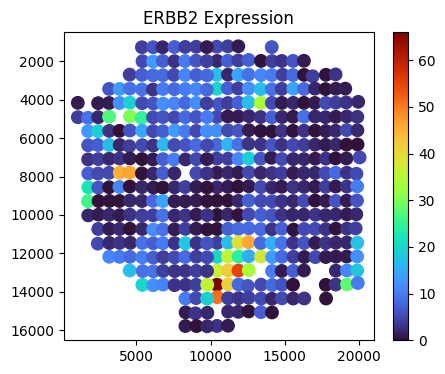

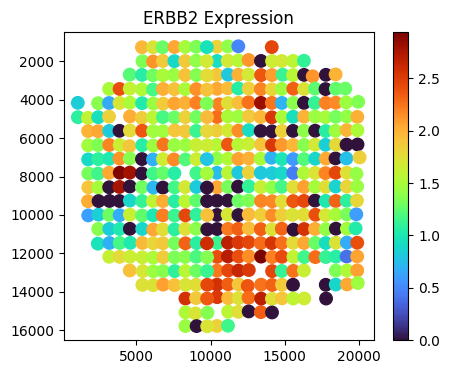

In [65]:
fstplt.gene_expr(adata_count, adata_count.to_df(), gene_selet='ERBB2', marker='o', 
                 s=80, figsize=(5, 4), cnt_color='turbo', save_path='ERBB2_expr_count.pdf')
fstplt.gene_expr(adata_norma, adata_norma.to_df(), gene_selet='ERBB2', marker='o', 
                 s=80, figsize=(5, 4), cnt_color='turbo', save_path='ERBB2_expr_norml.pdf')

## 2 Train and Test model

2.1 Data loader and splitting: 80% for train and 20% for test

Input: three input file pathway: \
    - `image_embed_path`: image embedding from **Setp0** `HIPT_image_feature_extract.py` \
    - `spatial_pos_path`: ordered ST spot coords, in `./Dataset/Demo/ContrastDemoLRgene/position_order.csv` \
    - `reduced_mtx_path`: ordered gene expression, in `./Dataset/Demo/ContrastDemoLRgene/harmony_matrix.np` 

For NPC dataset, the image embedding file can be downloaded [Goole Drive](https://drive.google.com/drive/folders/1ypaTohLM2lP4EnKeYTS6QUvv-ymcRVZo).

In [41]:
image_embed_path_NPC = str(path)+'FineST/FineST_local/Dataset/Demo/HIPT/Demo_pth_56_14/*.pth' 
spatial_pos_path = str(path)+'FineST/FineST_local/Dataset/Demo/ContrastDemoLRgene/position_order.csv'
reduced_mtx_path = str(path)+'FineST/FineST_local/Dataset/Demo/ContrastDemoLRgene/harmony_matrix.npy'

2.2 Train and test model on within spot

In [41]:
# train_loader, test_loader = fst.build_loaders(batch_size=params['batch_size'], 
#                                               image_embed_path=image_embed_path_NPC, 
#                                               spatial_pos_path=spatial_pos_path, 
#                                               reduced_mtx_path=reduced_mtx_path, 
#                                               image_clacss='Virchow2',
#                                               dataset_class='Visium16') 

In [42]:
# input_spot_test, input_image_test, input_coord_test, input_row_test, input_col_test = fst.extract_test_data(train_loader)
# print("input_spot_test:", input_spot_test.shape)
# print("input_image_test:", input_image_test.shape)
# print(input_image_test)
# print(input_spot_test)

In [43]:
# input_spot_test, input_image_test, input_coord_test, input_row_test, input_col_test = fst.extract_test_data(test_loader)
# print("input_spot_test:", input_spot_test.shape)
# print("input_image_test:", input_image_test.shape)
# print(input_image_test)
# print(input_spot_test)

In [44]:
# all_dataset = fst.build_loaders_inference(batch_size=adata.shape[0],
#                                           image_embed_path=image_embed_path_NPC,
#                                           spatial_pos_path=spatial_pos_path,
#                                           reduced_mtx_path=reduced_mtx_path,
#                                           image_clacss='Virchow2',
#                                           dataset_class='Visium16')

In [43]:
## add params
params['n_input_matrix'] = len(gene_hv)

## init the model
model = fst.FineSTModel(n_input_matrix=params['n_input_matrix'],
                              n_input_image=params['n_input_image'],
                              n_encoder_hidden_matrix=params["n_encoder_hidden_matrix"],
                              n_encoder_hidden_image=params["n_encoder_hidden_image"],
                              n_encoder_latent=params["n_encoder_latent"],
                              n_projection_hidden=params["n_projection_hidden"],
                              n_projection_output=params["n_projection_output"],
                              n_encoder_layers=params["n_encoder_layers"]).to(device) 
## Load the data
train_loader, test_loader = fst.build_loaders(batch_size=params['batch_size'], 
                                              image_embed_path=image_embed_path_NPC, 
                                              spatial_pos_path=spatial_pos_path, 
                                              reduced_mtx_path=reduced_mtx_path, 
                                              image_clacss='Virchow2',
                                              dataset_class='Visium16') 
## Set optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=params['inital_learning_rate'], 
                            momentum=0.9, weight_decay=5e-4)
## Load loss function
l = fst.ContrastiveLoss(temperature=params['temperature'], 
                        w1=params['w1'], w2=params['w2'], w3=params['w3'], w4=params['w4'])

## train model
(dir_name, 
 train_losses, test_losses, 
 best_epoch, best_loss) = fst.train_model_fst(params, model, train_loader, test_loader, 
                                          optimizer, l, dir_name, logger, dataset_class='Visium16')

Finished loading all files
train/test split completed
352 89
***** Finished building loaders *****


[2025-02-25 21:34:50] INFO - Begin Training ...
[2025-02-25 21:34:50] INFO - epoch [1/50]


Epoch: 1
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 121.28it/s]


image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............
--- 2.0237627029418945 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 150.50it/s]
[2025-02-25 21:34:52] INFO - Saved Best epoch & Best Model! Loss: [0: 2.2767348289489746]
[2025-02-25 21:34:52] INFO - epoch [2/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [0: 2.2767348289489746]
Epoch: 2
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 122.83it/s]

image_tensor: torch.Size([350, 16, 1280])


checkNeighbors.............
--- 0.7048609256744385 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 107.75it/s]
[2025-02-25 21:34:53] INFO - Saved Best epoch & Best Model! Loss: [1: 2.208057403564453]
[2025-02-25 21:34:53] INFO - epoch [3/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [1: 2.208057403564453]
Epoch: 3
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 160.56it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7539036273956299 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 109.02it/s]
[2025-02-25 21:34:53] INFO - Saved Best epoch & Best Model! Loss: [2: 2.1968281269073486]
[2025-02-25 21:34:53] INFO - epoch [4/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [2: 2.1968281269073486]
Epoch: 4
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 175.22it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7813408374786377 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 124.52it/s]
[2025-02-25 21:34:54] INFO - Saved Best epoch & Best Model! Loss: [3: 2.1609601974487305]
[2025-02-25 21:34:54] INFO - epoch [5/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [3: 2.1609601974487305]
Epoch: 5
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 143.26it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7513885498046875 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 116.65it/s]
[2025-02-25 21:34:55] INFO - Saved Best epoch & Best Model! Loss: [4: 2.12542724609375]
[2025-02-25 21:34:55] INFO - epoch [6/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [4: 2.12542724609375]
Epoch: 6
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 146.56it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.8449461460113525 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 123.50it/s]
[2025-02-25 21:34:56] INFO - Saved Best epoch & Best Model! Loss: [5: 2.1060452461242676]
[2025-02-25 21:34:56] INFO - epoch [7/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [5: 2.1060452461242676]
Epoch: 7
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 165.41it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.740849494934082 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.74it/s]
[2025-02-25 21:34:57] INFO - Saved Best epoch & Best Model! Loss: [6: 2.0971837043762207]
[2025-02-25 21:34:57] INFO - epoch [8/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [6: 2.0971837043762207]
Epoch: 8
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 148.75it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7784814834594727 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.65it/s]
[2025-02-25 21:34:58] INFO - Saved Best epoch & Best Model! Loss: [7: 2.0714845657348633]
[2025-02-25 21:34:58] INFO - epoch [9/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [7: 2.0714845657348633]
Epoch: 9
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 152.04it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.8362410068511963 seconds ---
test model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.58it/s]
[2025-02-25 21:34:59] INFO - epoch [10/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 10
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 155.53it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.8078935146331787 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 113.65it/s]
[2025-02-25 21:35:00] INFO - Saved Best epoch & Best Model! Loss: [9: 2.0481417179107666]
[2025-02-25 21:35:00] INFO - epoch [11/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [9: 2.0481417179107666]
Epoch: 11
train model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 88.79it/s]


image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............
--- 0.7842123508453369 seconds ---
test model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 81.59it/s]
[2025-02-25 21:35:01] INFO - epoch [12/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 12
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 165.77it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.8046705722808838 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 107.02it/s]
[2025-02-25 21:35:02] INFO - Saved Best epoch & Best Model! Loss: [11: 2.001929759979248]
[2025-02-25 21:35:02] INFO - epoch [13/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [11: 2.001929759979248]
Epoch: 13
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 159.13it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7186684608459473 seconds ---
test model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.76it/s]
[2025-02-25 21:35:02] INFO - epoch [14/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 14
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 157.67it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.6941437721252441 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 218.37it/s]
[2025-02-25 21:35:03] INFO - epoch [15/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 15
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 157.40it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7442679405212402 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 106.56it/s]
[2025-02-25 21:35:04] INFO - epoch [16/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 16
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 136.02it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7217855453491211 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 134.47it/s]
[2025-02-25 21:35:05] INFO - epoch [17/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 17
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 163.53it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.712899923324585 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 132.60it/s]
[2025-02-25 21:35:06] INFO - epoch [18/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 18
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 161.60it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7112278938293457 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 118.34it/s]
[2025-02-25 21:35:06] INFO - epoch [19/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 19
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 164.77it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.775050163269043 seconds ---
test model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.45it/s]
[2025-02-25 21:35:07] INFO - epoch [20/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 20
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 153.31it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7141134738922119 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 118.20it/s]
[2025-02-25 21:35:08] INFO - Saved Best epoch & Best Model! Loss: [19: 1.9647986888885498]
[2025-02-25 21:35:08] INFO - epoch [21/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [19: 1.9647986888885498]
Epoch: 21
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 139.38it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.827967643737793 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 101.69it/s]
[2025-02-25 21:35:09] INFO - epoch [22/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 22
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 102.93it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.829883337020874 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 128.02it/s]
[2025-02-25 21:35:10] INFO - epoch [23/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 23
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 120.65it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.6942675113677979 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 178.20it/s]
[2025-02-25 21:35:11] INFO - epoch [24/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 24
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 104.88it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.6961431503295898 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 114.32it/s]
[2025-02-25 21:35:12] INFO - epoch [25/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 25
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 153.51it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7497637271881104 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 114.34it/s]
[2025-02-25 21:35:12] INFO - epoch [26/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 26
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 156.59it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7248537540435791 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 144.09it/s]
[2025-02-25 21:35:13] INFO - epoch [27/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 27
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 128.72it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.688248872756958 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 113.26it/s]
[2025-02-25 21:35:14] INFO - epoch [28/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 28
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 160.63it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.8070394992828369 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.73it/s]
[2025-02-25 21:35:15] INFO - epoch [29/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 29
train model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 90.35it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7255241870880127 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 114.13it/s]
[2025-02-25 21:35:16] INFO - epoch [30/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 30
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 161.64it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7546327114105225 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 106.43it/s]
[2025-02-25 21:35:17] INFO - epoch [31/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 31
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 160.81it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7888367176055908 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 129.68it/s]
[2025-02-25 21:35:17] INFO - epoch [32/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 32
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 164.43it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.74188232421875 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 115.24it/s]
[2025-02-25 21:35:18] INFO - epoch [33/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 33
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 161.98it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.74884033203125 seconds ---
test model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.96it/s]
[2025-02-25 21:35:19] INFO - epoch [34/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 34
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 160.81it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.825676679611206 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 110.73it/s]
[2025-02-25 21:35:20] INFO - epoch [35/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 35
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 161.75it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.8052530288696289 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 162.53it/s]
[2025-02-25 21:35:21] INFO - epoch [36/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 36
train model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 98.93it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.8674955368041992 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 115.46it/s]
[2025-02-25 21:35:22] INFO - epoch [37/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 37
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 171.20it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.8214435577392578 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 133.93it/s]
[2025-02-25 21:35:23] INFO - epoch [38/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 38
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 152.64it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.6625683307647705 seconds ---
test model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54.26it/s]
[2025-02-25 21:35:23] INFO - epoch [39/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 39
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 169.37it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7014079093933105 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 105.03it/s]
[2025-02-25 21:35:24] INFO - epoch [40/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 40
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 167.55it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.6767313480377197 seconds ---
test model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.49it/s]
[2025-02-25 21:35:25] INFO - epoch [41/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 41
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 120.50it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7199041843414307 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 122.39it/s]
[2025-02-25 21:35:26] INFO - epoch [42/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 42
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 171.88it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.6600198745727539 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 128.52it/s]
[2025-02-25 21:35:27] INFO - Saved Best epoch & Best Model! Loss: [41: 1.9583055973052979]
[2025-02-25 21:35:27] INFO - epoch [43/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Saved Best epoch & Best Model! Loss: [41: 1.9583055973052979]
Epoch: 43
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 154.45it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.6814134120941162 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 125.22it/s]
[2025-02-25 21:35:27] INFO - epoch [44/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 44
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 101.41it/s]


image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............
--- 0.7222883701324463 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 146.91it/s]
[2025-02-25 21:35:28] INFO - epoch [45/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 45
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 108.17it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7809743881225586 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 127.61it/s]
[2025-02-25 21:35:29] INFO - epoch [46/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 46
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 153.50it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.6611125469207764 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 120.95it/s]
[2025-02-25 21:35:30] INFO - epoch [47/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 47
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 141.68it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.8554863929748535 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 113.82it/s]
[2025-02-25 21:35:31] INFO - epoch [48/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 48
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 160.35it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.6332738399505615 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 137.83it/s]
[2025-02-25 21:35:32] INFO - epoch [49/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 49
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 163.32it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7280764579772949 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 107.39it/s]
[2025-02-25 21:35:32] INFO - epoch [50/50]


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Epoch: 50
train model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 162.78it/s]

image_tensor: torch.Size([350, 16, 1280])
checkNeighbors.............


--- 0.7223777770996094 seconds ---
test model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 114.01it/s]
[2025-02-25 21:35:33] INFO - Done!, Best epoch & Best Model! Loss: [41: 1.9583055973052979]
[2025-02-25 21:35:33] INFO - Finished Training


image_tensor: torch.Size([50, 16, 1280])
checkNeighbors.............
Done!, final loss: 1.9583055973052979
Best epoch: 41
--- 43.54628777503967 seconds ---


In [44]:
pwd

'/mnt/lingyu/nfs_share2/Python/FineST/FineST_local/Dataset/ImputData/Demo_FineST/Figure'

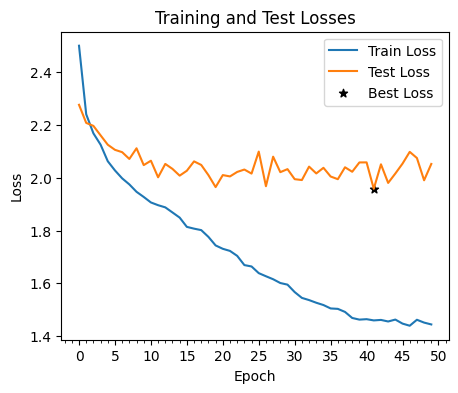

In [45]:
fst.loss_curve(train_losses, test_losses, best_epoch, best_loss, max_step=5, min_step=1, 
               fig_size=(5, 4), format='svg', save_path='Loss_cvrve_demo_allLRgs.svg')

<div class="alert alert-info">

**Note**
The above cell for `section 2.2` needs to be run more than once by setting different parameters in the given `.json` file, if the correlation in `section 3.4` is not satisfying. If one obtains a good performance, one can save the `dir_name` and then directly use it to load the trained model and infer gene expression, and doesn't need to run `section 2.2` again. Recommended parameter fine-tuning and its range: `training_epoch`: 40~60; 
`temperature`: 0.01-0.05.

</div>

## 3. Inference, Imputation and Evaluation on within spot

3.1 Infer the gene expression of within spots

In [46]:
dir_name

'/mnt/lingyu/nfs_share2/Python/FineST/FineST_local/Finetune/20250225213442149378'

You can use the `dir_name` just obtained from the above cell, but here we use our trained `dir_name` for paper results repeated (saved in `FineST/FineST/Finetune/20250225212431608560`).

In [47]:
# dir_name = str(path)+'FineST/FineST_local/Finetune/2025025212431608560' # min_cells=1
dir_name = str(path)+'FineST/FineST_local/Finetune/20250225213442149378' # min_cells=0

In [48]:
## Load the trained model
model = fst.load_model(dir_name, parameter_file_path, params, gene_hv)

## Load test data
test_loader = fst.build_loaders_inference(batch_size=adata.shape[0], 
                                          image_embed_path=image_embed_path_NPC, 
                                          spatial_pos_path=spatial_pos_path, 
                                          reduced_mtx_path=reduced_mtx_path,
                                          image_clacss='Virchow2',
                                          dataset_class='Visium16')
## Inference
(matrix_profile,
 reconstructed_matrix, 
 recon_ref_adata_image_f2, 
 reconstructed_matrix_reshaped, 
 input_coord_all) = fst.infer_model_fst(model, test_loader, logger, dataset_class='Visium16')

[2025-02-25 23:09:16] INFO - Running inference task...


Finished loading all files
***** Finished building loaders_inference *****
device cuda:0
***** Begin perform_inference: ******


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.52it/s]

***** batch_size=adata.shape[0] doen't effect *****
torch.Size([441, 647])
torch.Size([441, 16, 1280])
1
1
1
***** *****
Finished extractting test data



[2025-02-25 23:09:17] INFO - Running inference task DONE!


--- 0.35297513008117676 seconds for inference within spots ---
Reconstructed_matrix_reshaped shape:  torch.Size([7056, 647])


In [49]:
print(matrix_profile)
print(reconstructed_matrix)
print(recon_ref_adata_image_f2)
print(input_coord_all)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 4. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]
[[0.09811556 0.00925002 0.00976041 ... 0.00925135 0.05734217 0.00821138]
 [0.00968614 0.00853146 0.00715685 ... 0.00801609 0.00916301 0.00630441]
 [0.09017586 0.16494617 0.01208244 ... 0.00820829 0.57795185 0.0060407 ]
 ...
 [0.05360792 0.00895031 0.00825155 ... 0.00870989 0.00960729 0.00855205]
 [0.00834366 0.00856199 0.0083601  ... 0.0051428  0.04961061 0.00600153]
 [0.04252668 0.00902818 0.00875428 ... 0.00944272 0.00998054 0.00824875]]
[[0.08125865 0.01641767 0.01061217 ... 0.00793805 0.02972159 0.00814416]
 [0.01345231 0.02695793 0.00759121 ... 0.00840887 0.01990831 0.00668759]
 [0.03220735 0.1597349  0.03828571 ... 0.00817165 0.21686108 0.00784339]
 ...
 [0.0199759  0.00892561 0.00805292 ... 0.00821835 0.00862657 0.00812187]
 [0.01728782 0.02685513 0.03752211 ... 0.00704592 0.01613463 0.00650321]
 [0.04118104 0.00872994 0.0084

3.2 Get coordinates of sub-spots from within spots

We use `reshape_latent_image()` function to convert the super-resolved gene expression with 16X relolution `reconstructed_matrix_reshaped` (torch.Size([21296, 596])) into tensor format `reconstructed_matrix_reshaped_tensor` (torch.Size([1331, 16, 596])).

In [50]:
reconstructed_matrix_reshaped_tensor, _ = fst.reshape_latent_image(reconstructed_matrix_reshaped, 
                                                                   dataset_class='Visium16')
print("The size of reconstructed tensor data:", reconstructed_matrix_reshaped_tensor.shape)

The size of reconstructed tensor data: torch.Size([441, 16, 647])


In [53]:
# scale_factors = fst.json_load(f"{path}/FineST/FineST_local/Dataset/NPC/patient1/")
# print(scale_factors['spot_diameter_fullres'])

In [51]:
(first_spot_first_variable, C,
 _, _, _) = fst.subspot_coord_expr_adata(reconstructed_matrix_reshaped_tensor, adata, gene_hv, 
                                         p=0, q=0, patch_size=56, dataset_class='Visium16')
print("first_spot_first_variable shape:", first_spot_first_variable.shape)

pixel_step (half of patch_size): 7.0
first_spot_first_variable shape: (16,)


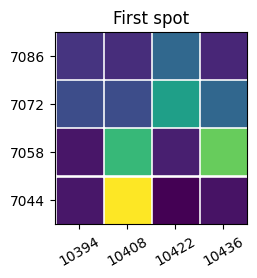

In [52]:
fstplt.subspot_expr(C, first_spot_first_variable, patch_size=56, dataset_class='Visium16', 
                     marker='s', s=1050, rotation=30, save_path=None)

In [53]:
## Get the sub-spot level gene expression of all genes in all within spots
(_, _, all_spot_all_variable,
 C2, adata_infer) = fst.subspot_coord_expr_adata(reconstructed_matrix_reshaped_tensor,
                                                adata, gene_hv, patch_size=56, dataset_class='Visium16')
print("all_spot_all_variable shape:", all_spot_all_variable.shape)
print(adata_infer)

pixel_step (half of patch_size): 7.0
all_spot_all_variable shape: (7056, 647)
AnnData object with n_obs × n_vars = 7056 × 647
    obs: 'x', 'y'
    obsm: 'spatial'


In [54]:
print(adata_infer.obs[['x', 'y']])
print(adata_infer.obsm['spatial'])
print(adata_infer.obsm['spatial'][:,0].max(), adata_infer.obsm['spatial'][:,1].max())

          x      y
0     10394   7044
1     10408   7044
2     10422   7044
3     10436   7044
4     10394   7058
...     ...    ...
7051   9808  15100
7052   9766  15114
7053   9780  15114
7054   9794  15114
7055   9808  15114

[7056 rows x 2 columns]
[[10394  7044]
 [10408  7044]
 [10422  7044]
 ...
 [ 9780 15114]
 [ 9794 15114]
 [ 9808 15114]]
20078 15819


Here, `adata_infer` is the inferred super-resolved gene expression data with 16X solution.

In [55]:
_, adata_infer_reshape = fst.reshape_latent_image(torch.tensor(adata_infer.X), dataset_class='Visium16')
print("adata_infer shape:", adata_infer.shape)
print("adata_infer_reshape shape:", adata_infer_reshape.shape)

adata_infer shape: (7056, 647)
adata_infer_reshape shape: torch.Size([441, 647])


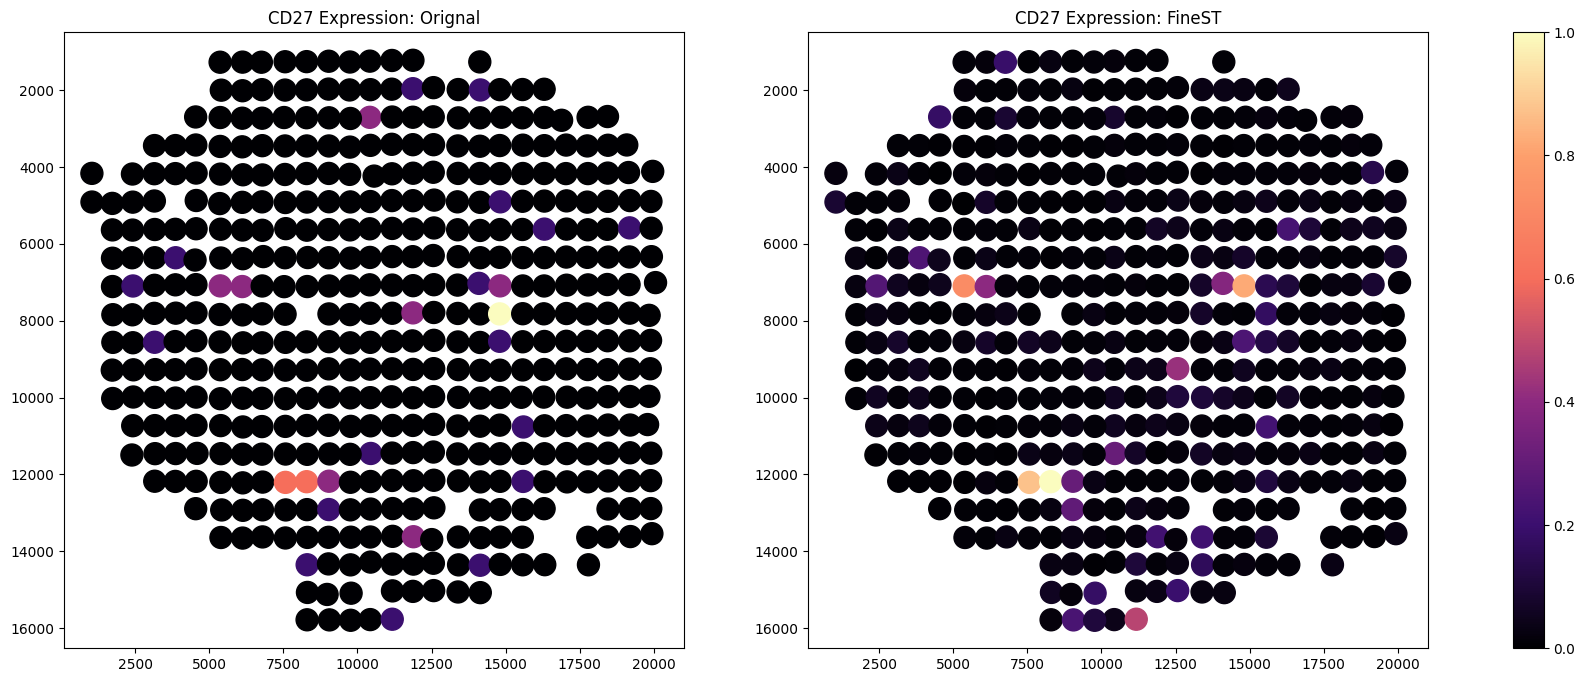

In [56]:
fstplt.gene_expr_compare(adata, "CD27", adata_infer_reshape, gene_hv, s=250, save_path=None)

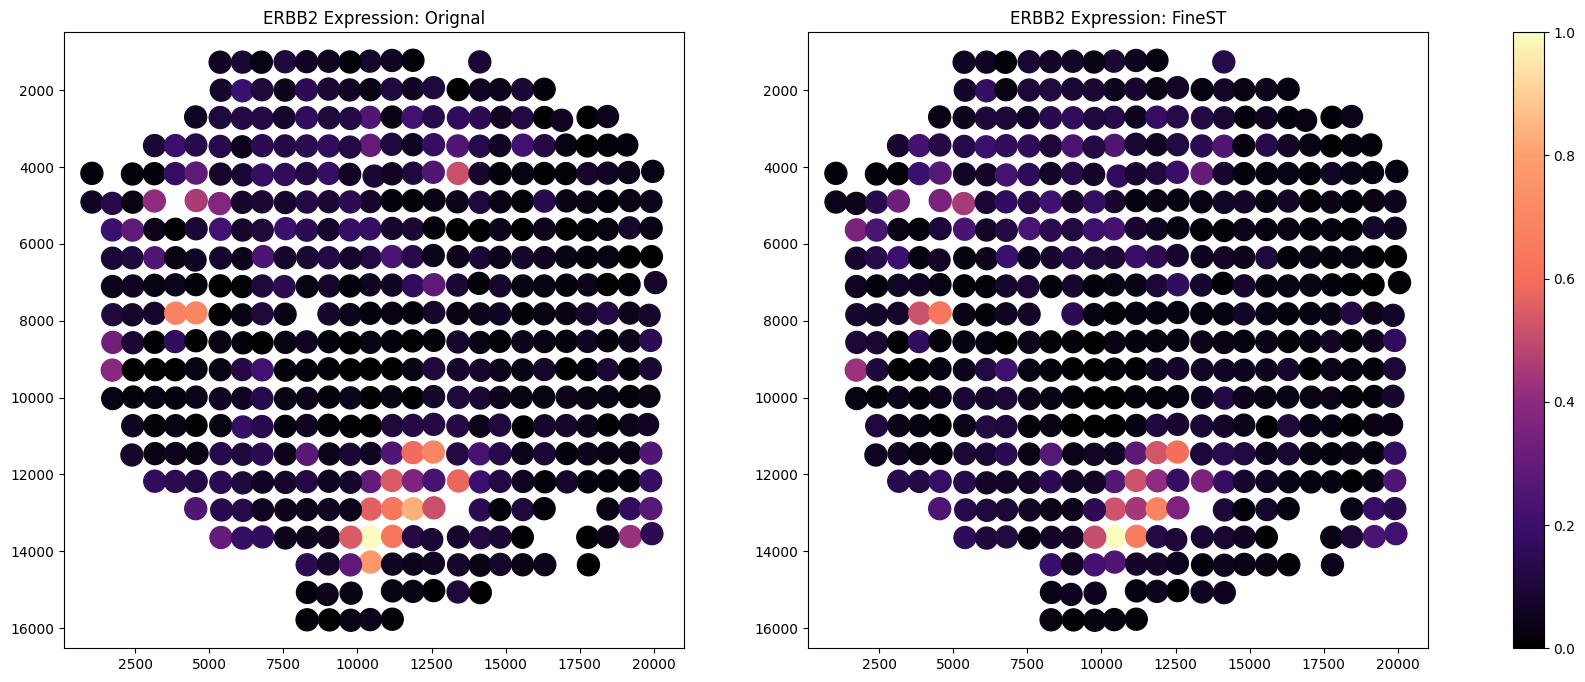

In [57]:
fstplt.gene_expr_compare(adata, "ERBB2", adata_infer_reshape, gene_hv, s=250, save_path=None)

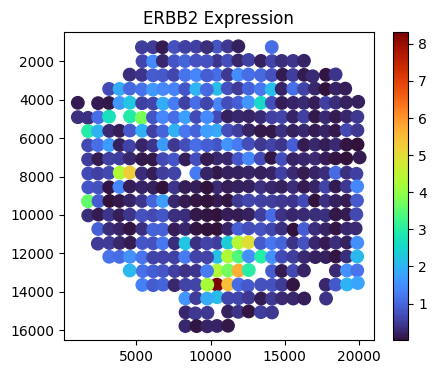

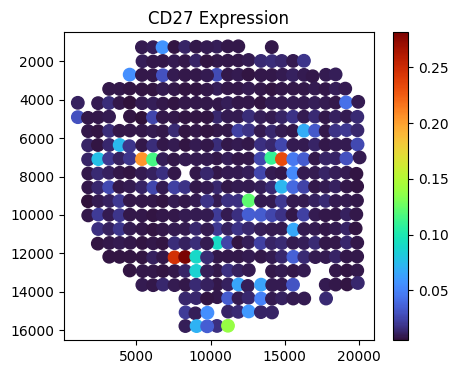

In [62]:
fstplt.gene_expr(adata, adata_infer_reshape, gene_selet='ERBB2', marker='o', 
                 s=80, figsize=(5, 4), cnt_color='turbo',
                 # save_path=None)
                 save_path='ERBB2_expr_infer.pdf')

fstplt.gene_expr(adata, adata_infer_reshape, gene_selet='CD27', marker='o', 
                 s=80, figsize=(5, 4), cnt_color='turbo', save_path='CD27_expr_infer.pdf')

0.8438119241131888
0.518594758845764


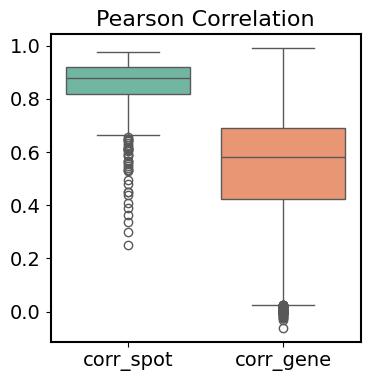

0.7469443256238438
0.37708428803191435


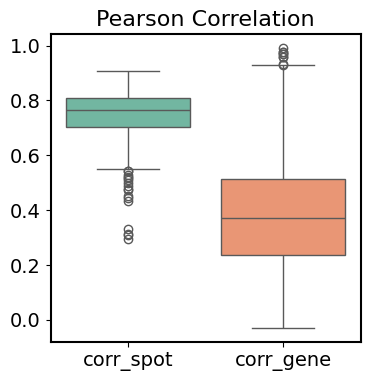

In [60]:
fstplt.mean_cor_box(adata, adata_infer_reshape, save_path='Boxplot_infer_cor_count.pdf')
fstplt.mean_cor_box(adata_norma, adata_infer_reshape, save_path='Boxplot_infer_cor_norml.pdf')

In [56]:
adata_infer_spot = fst.reshape2adata(adata, adata_infer_reshape, gene_hv)
adata_infer_spot.to_df()

,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,SEMA6D,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1
15x19,0.081259,0.016418,0.010612,0.007467,0.016015,0.007447,0.008951,0.022685,0.012328,0.008821,...,0.008332,0.007789,0.016270,0.009386,0.008195,0.013419,0.007877,0.007938,0.029722,0.008144
15x21,0.013452,0.026958,0.007591,0.005829,0.007995,0.007785,0.008139,0.012783,0.008177,0.008930,...,0.007441,0.006457,0.007581,0.008397,0.028308,0.006756,0.007311,0.008409,0.019908,0.006688
15x25,0.032207,0.159735,0.038286,0.009353,0.007072,0.006671,0.007533,0.033302,0.014748,0.030480,...,0.007550,0.007322,0.027524,0.008183,0.007379,0.006517,0.010280,0.008172,0.216861,0.007843
15x27,0.049247,0.024144,0.008317,0.006575,0.011221,0.008214,0.008096,0.027744,0.009017,0.018914,...,0.007882,0.007843,0.013813,0.007703,0.014229,0.018180,0.007720,0.013550,0.162597,0.007971
15x20,0.119307,0.048920,0.011436,0.007691,0.011840,0.014636,0.007692,0.008293,0.008435,0.010631,...,0.006989,0.043717,0.011705,0.007852,0.012633,0.013552,0.015486,0.009103,0.386875,0.012834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16x20,0.051323,0.041818,0.027178,0.007682,0.012097,0.010532,0.013264,0.016291,0.012213,0.024528,...,0.008085,0.007328,0.008270,0.008015,0.008215,0.017346,0.018824,0.008693,0.176034,0.014691
16x7,0.052623,0.008779,0.008794,0.006862,0.008059,0.007028,0.008790,0.008925,0.008475,0.008356,...,0.007908,0.008506,0.008478,0.008684,0.009374,0.007993,0.006814,0.009024,0.065491,0.008382
16x14,0.019976,0.008926,0.008053,0.006833,0.007763,0.007272,0.014728,0.009765,0.069536,0.008028,...,0.008074,0.008174,0.009039,0.007924,0.008372,0.007692,0.006845,0.008218,0.008627,0.008122
16x10,0.017288,0.026855,0.037522,0.005255,0.007230,0.007821,0.013074,0.178009,0.006572,0.007531,...,0.007216,0.005949,0.005366,0.052425,0.029245,0.007041,0.005913,0.007046,0.016135,0.006503


nan


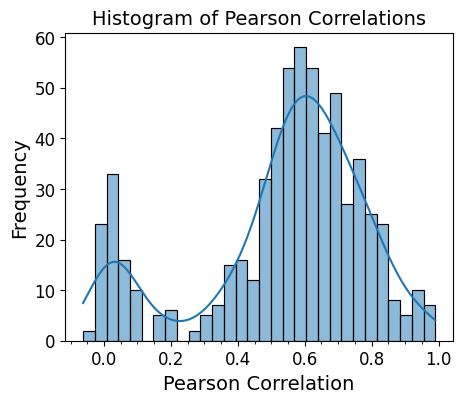

In [63]:
fstplt.cor_hist(adata, adata_infer_spot.to_df(), max_step=0.2, min_step=0.05,
                 fig_size=(5, 4), trans=False, format='svg', 
                 save_path='Hist_infer_cor_count_allLRgs.svg')

In [64]:
print(adata_infer)
print(adata_infer_spot)

AnnData object with n_obs × n_vars = 7056 × 647
    obs: 'x', 'y'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 441 × 647
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'mt', 'n_cells'
    obsm: 'spatial'


In [65]:
## save adata 85184 × 596
patientxy = 'Demo_FineST'
adata_infer.write_h5ad(str(path)+'FineST/FineST_local/Dataset/ImputData/'+str(patientxy)+'/'+str(patientxy)+'_adata_infer.h5ad')

In [66]:
## save adata 1331 × 596
patientxy = 'Demo_FineST'
adata_infer_spot.write_h5ad(str(path)+'FineST/FineST_local/Dataset/ImputData/'+str(patientxy)+'/'+str(patientxy)+'_adata_infer_spot.h5ad')

In [63]:
pwd

'/mnt/lingyu/nfs_share2/Python/FineST/FineST_local/Dataset/ImputData/Demo_FineST/Figure'

In [60]:
gene='ERBB2'
import scipy.stats as st
print(st.pearsonr(adata_infer_spot.to_df()[str(gene)].values, adata_infer_spot.to_df()[str(gene)].values))

PearsonRResult(statistic=0.9999999999999998, pvalue=0.0)
